In [23]:
import numpy as np
import tensorflow as tf
import os
import scipy.misc
from easydict import EasyDict as edict
from WESPE_DIV2K import *
from dataloader.dataloader_DIV2K import *
from ops import *
from utils import *
# os.environ["CUDA_VISIBLE_DEVICES"]="1"
%reload_ext autoreload
%autoreload 2

config = edict()
# training parameters
config.batch_size = 64#32
config.patch_size = 100
config.mode = "RGB"
config.channels = 3
config.content_layer = 'relu2_2' # originally relu5_4 in DPED
config.learning_rate = 1e-4
config.augmentation = True #data augmentation (flip, rotation)
config.test_every = 200
config.train_iter = 50000
# config.sample_size = 100000
# weights for loss
config.w_content = 1 # reconstruction (originally 1)
config.w_profile = 0.01
config.w_color = 1 # gan color (originally 5e-3)
config.w_texture = 1 # gan texture (originally 5e-3)
config.w_tv = 1 # total variation (originally 400)
config.gamma = 0.6
config.model_name = "WESPE_DIV2K_arnav_gpu1"
# directories
config.dataset_name = "iphone"
config.train_path_phone = os.path.join("/home/grads/a/arnav1993k/DPED/dped/iphone/training_data/iphone","*.jpg")
config.train_path_canon = os.path.join("/home/grads/a/arnav1993k/DPED/dped/iphone/training_data/canon","*.jpg")
config.train_path_DIV2K = os.path.join("/home/grads/a/arnav1993k/DPED/DIV2K_train_HR","*.png")

config.test_path_phone_patch = os.path.join("/home/grads/a/arnav1993k/DPED/sample_images/original_images/iphone","*.jpg")
config.test_path_phone_image = os.path.join("/home/grads/a/arnav1993k/DPED/reference_img","*.jpg")

config.vgg_dir = "../vgg_pretrained/imagenet-vgg-verydeep-19.mat"

config.result_dir = os.path.join("./result", config.model_name)
config.result_img_dir = os.path.join(config.result_dir, "samples")
config.checkpoint_dir = os.path.join(config.result_dir, "model")

if not os.path.exists(config.result_dir):
    print("creating dir...", config.result_dir)
    os.makedirs(config.result_dir)
    
if not os.path.exists(config.checkpoint_dir):
    print("creating dir...", config.checkpoint_dir)
    os.makedirs(config.checkpoint_dir)

if not os.path.exists(config.result_img_dir):
    print("creating dir...", config.result_img_dir)
    os.makedirs(config.result_img_dir)
    
config.sample_dir = "samples_DIV2K/reference_img"
if not os.path.exists(config.sample_dir):
    print("creating dir...", config.sample_dir)
    os.makedirs(config.sample_dir)

In [2]:
# load dataset
dataset_phone, dataset_canon, dataset_DIV2K = load_dataset(config)

Dataset: iphone, 160471 images
DIV2K: 800 images
160471 images loaded! setting took: 230.4502s


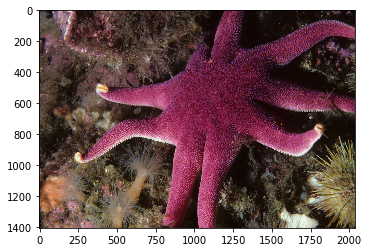

In [9]:
# index = np.random.randint(len(dataset_phone))
scipy.ndimage.imread
# !pip install matplotlib
phone_img = dataset_phone[0]
canon_img = dataset_canon[0]
DIV2K_img = dataset_DIV2K[0]
import matplotlib.pyplot as plt
plt.imshow(phone_img)
plt.imshow(canon_img)
plt.imshow(DIV2K_img)
plt.show()

In [10]:
phone_batch, canon_batch, DIV2K_batch = get_batch(dataset_phone, dataset_canon, dataset_DIV2K, config, start = 0)
print('done!')

done!


In [17]:
# sess= tf.InteractiveSession()
# blurred2 = sess.run(gaussian_blur(tf.image.rgb_to_yuv(DIV2K_batch)))

blurred = sess.run(gaussian_blur(tf.image.rgb_to_yuv(phone_batch)))

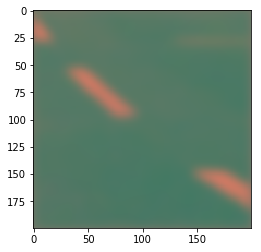

In [18]:
phone_img = postprocess(blurred2[5])
canon_img = postprocess(blurred[5])
DIV2K_img = postprocess(DIV2K_batch[5])
import matplotlib.pyplot as plt
plt.imshow(phone_img)
# plt.imshow(canon_img)
# plt.imshow(DIV2K_img)
plt.show()

In [ ]:
DIV2K_batch[0]

In [20]:
# build WESPE model
tf.reset_default_graph()
# uncomment this when only trying to test the model
dataset_phone = []
dataset_canon = []
dataset_DIV2K = []
config_proto = tf.ConfigProto(
        device_count = {'GPU': 0}
    )
sess = tf.Session(config=config_proto)
# sess = tf.Session()
model = WESPE(sess, config, dataset_phone, dataset_canon, dataset_DIV2K)

Completed building generator. Number of variables: 26
Discriminator-color (blur)
Discriminator-color (blur)
Completed building discriminator_profile discriminator. Number of variables = 22
Discriminator-color (none)
Discriminator-color (none)
Completed building discriminator_color discriminator. Number of variables = 22
Discriminator-texture
Discriminator-texture
Completed building discriminator_texture discriminator. Number of variables = 22


In [ ]:
# train generator & discriminator together
model.train(load = False)

 Overall training starts from beginning
(64, 100, 100, 3) (64, 100, 100, 3) (64, 100, 100, 3)
Iteration 0, runtime: 8.381 s, generator loss: 38684.210938
Loss per component: content 37777.386719,profile 0.733674, color 0.755627, texture 0.719766, tv 905.345154
(runtime: 10.239 s) Average test PSNR for 100 random test image patches: phone-enhanced 11.116
(64, 100, 100, 3) (64, 100, 100, 3) (64, 100, 100, 3)
Iteration 200, runtime: 95.938 s, generator loss: 36990.175781
Loss per component: content 34276.285156,profile 1577.960815, color 1525.678955, texture 288.727478, tv 883.704712
(runtime: 10.021 s) Average test PSNR for 100 random test image patches: phone-enhanced 12.983
(64, 100, 100, 3) (64, 100, 100, 3) (64, 100, 100, 3)
Iteration 400, runtime: 183.511 s, generator loss: 28989.939453
Loss per component: content 26801.986328,profile 912.952026, color 1287.737305, texture 151.313095, tv 739.775024
(runtime: 9.920 s) Average test PSNR for 100 random test image patches: phone-enhance

In [24]:
# test trained model
model.test_generator(0, 8, load = True)

Loading checkpoints from  ./result/WESPE_DIV2K_arnav_gpu1/model/iphone
INFO:tensorflow:Restoring parameters from ./result/WESPE_DIV2K_arnav_gpu1/model/iphone/WESPE_DIV2K_arnav_gpu1
 [*] Load SUCCESS
(runtime: 0.001 s) Average test PSNR for 0 random test image patches: phone-enhanced nan
(runtime: 48.520 s) Average test PSNR for 8 random full test images: original-enhanced 20.010


In [ ]:
# save trained model
model.save()